<a href="https://colab.research.google.com/github/Magesh-Sundaravel/Machine_Learning/blob/main/Logistic_Regresssion_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

In [86]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
# Read the data
train=pd.read_csv("/content/drive/MyDrive/titanic_train.csv")


In [88]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


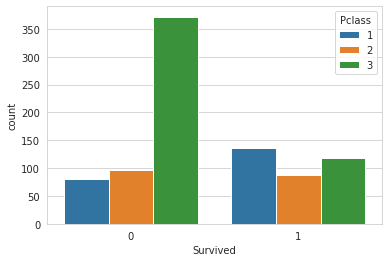

In [89]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived',hue='Pclass')
plt.show()

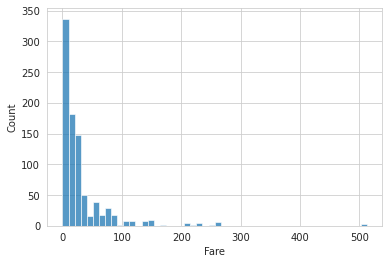

In [90]:
sns.histplot(train['Fare'].dropna(),bins=50)
plt.show()

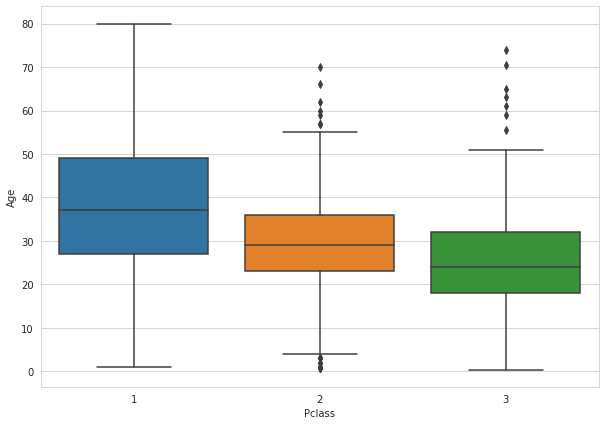

In [91]:
plt.figure(figsize=(10,7))
sns.boxplot(data=train,x='Pclass',y='Age')
plt.show()

In [92]:
# Step 2 - Cleaning the data and adding some missing values and removing the unwanted columns.and then changing the categorical columns into dummies.

# You can impute by adding a fucntion
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [93]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [94]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)

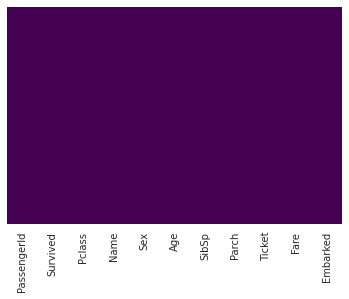

In [95]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()
# All the null values are removed

In [96]:
# Now create dummy to make the Sex column to be read by the machine learning algorithm

sex = pd.get_dummies(train['Sex'],drop_first=True, prefix = 'Sex',prefix_sep = '_')
embark = pd.get_dummies(train['Embarked'],drop_first=True, prefix = 'Embarked',prefix_sep = '_')
pclass = pd.get_dummies(train['Pclass'],drop_first=True, prefix = 'Pclass',prefix_sep = '_')

In [97]:
train=pd.concat([train,sex,embark,pclass],axis=1)
train.drop(['Name','Embarked','Sex','PassengerId','Ticket','Pclass' ],axis=1,inplace=True)

train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [98]:
# Step 3 - Building a Logistic Regression model
# Train Test Split

from sklearn.model_selection import train_test_split

X = train.drop('Survived',axis = 1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=101)

In [99]:
# Train the model
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [100]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[98  9]
 [25 46]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       107
           1       0.84      0.65      0.73        71

    accuracy                           0.81       178
   macro avg       0.82      0.78      0.79       178
weighted avg       0.81      0.81      0.80       178

